# Iris Dataset Summary Statistics
This project focuses on analyzing the Iris dataset, a well-known dataset in the field of machine learning and statistics.  
The analysis includes generating summary statistics, visualizations, and insights into the dataset's features and species.  
The goal is to provide a comprehensive overview of the dataset, including variable summaries, histograms, and scatter plots for different variable pairs.

### Author: Carmine Giardino


In [83]:
# Import pandas for data manipulation and analysis.
import pandas as pd
# Import load_iris to load the Iris dataset from scikit-learn.
from sklearn.datasets import load_iris
# Import matplotlib for plotting.
import matplotlib.pyplot as plt

## Load the Iris dataset.
Load the Iris dataset from scikit-learn and convert it to a pandas DataFrame.
### References:
- [Load Iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)
- [Pandas Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

In [84]:
# Load the Iris dataset.
iris = load_iris()

# Convert the dataset to a pandas DataFrame.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the species names to the DataFrame
target_column_name = 'species'
# The target names are stored in the 'target' attribute of the dataset with integer labels. So we need to map them to the actual names.
iris_df[target_column_name] = iris.target_names[iris.target]


## Group by species name and compute summary statistics.
### References: 
- [DataFrame groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
- [DataFrame describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)
- [DataFrame rename axis](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename_axis.html)
- [DataFrame reset index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)

In [85]:
iris_summary_by_class = iris_df.groupby(target_column_name).describe().reset_index()

## Flatten the multi-level column headers.
### Reference: 
- [Flatten headers](https://chatgpt.com/share/67f98414-0680-800f-aa4e-0e5b69996c99) - couldn't find an easy way to do this in the documentation.

In [86]:
iris_summary_by_class.columns = [' '.join(col).strip() for col in iris_summary_by_class.columns.values]

## Save the summary DataFrame to a text file.
### Reference: 
- [DataFrame to string](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_string.html)
- [Python file write](https://www.w3schools.com/python/python_file_write.asp)

In [87]:
output_content = iris_summary_by_class.to_string(index=False, float_format='{:0.2f}'.format)
output_filename = 'iris_summary_statistics.txt'
with open(output_filename, 'w') as file:
    file.write("Variable Summary Analysis\n")
    file.write(output_content)
    file.write("\n")
    
# Display the DataFrame directly in the notebook
display(iris_summary_by_class)

,species,sepal length (cm) count,sepal length (cm) mean,sepal length (cm) std,sepal length (cm) min,sepal length (cm) 25%,sepal length (cm) 50%,sepal length (cm) 75%,sepal length (cm) max,sepal width (cm) count,...,petal length (cm) 75%,petal length (cm) max,petal width (cm) count,petal width (cm) mean,petal width (cm) std,petal width (cm) min,petal width (cm) 25%,petal width (cm) 50%,petal width (cm) 75%,petal width (cm) max
0,setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8,50.0,...,1.575,1.9,50.0,0.246,0.105386,0.1,0.2,0.2,0.3,0.6
1,versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0,50.0,...,4.600,5.1,50.0,1.326,0.197753,1.0,1.2,1.3,1.5,1.8
2,virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9,50.0,...,5.875,6.9,50.0,2.026,0.274650,1.4,1.8,2.0,2.3,2.5


## Create and save histograms for each feature.
Create histograms for each feature in the Iris dataset and save them as image files.
### References:
- [Matplotlib figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)

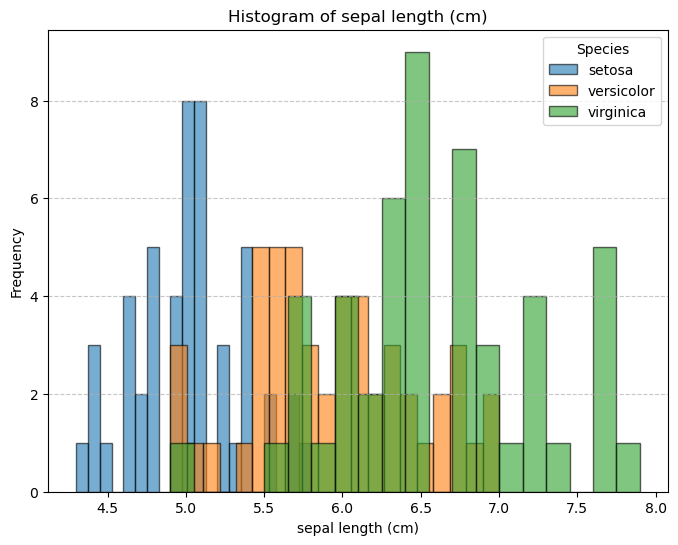

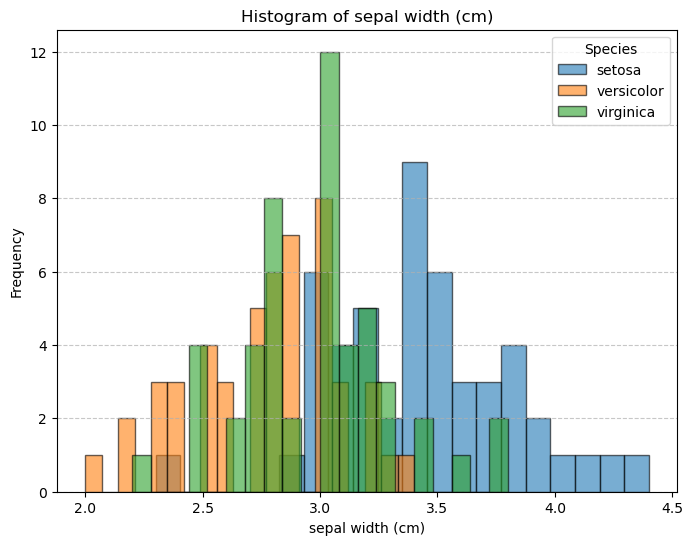

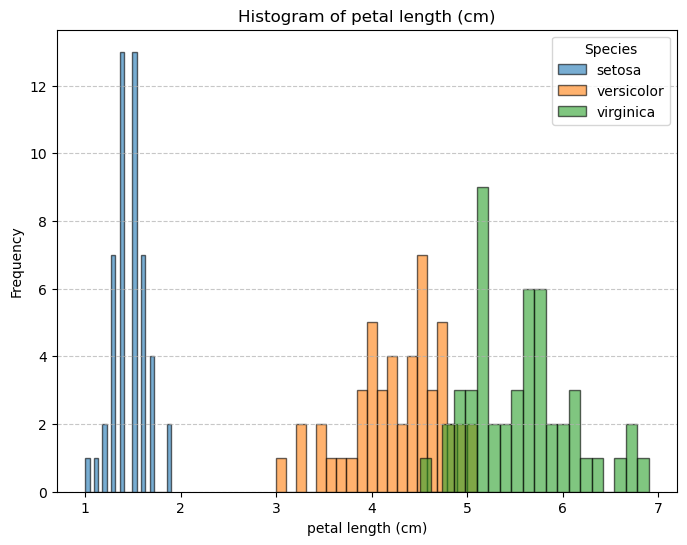

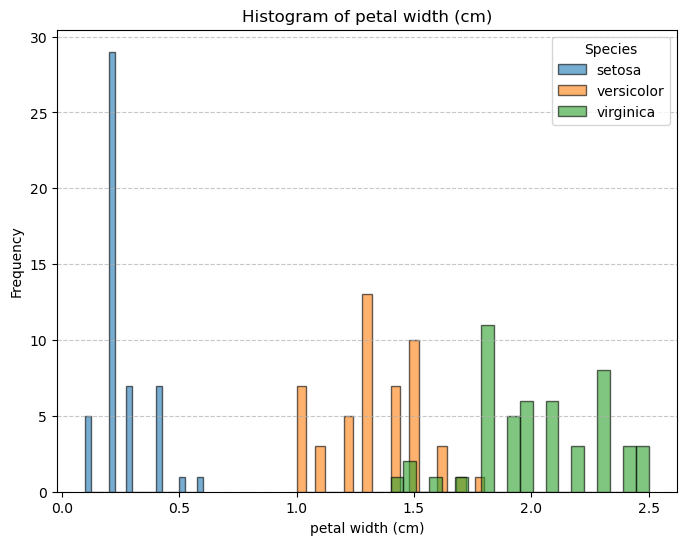

In [88]:
# List of feature names
feature_names = iris.feature_names

# Create and save histograms for each feature
for feature in feature_names:
    plt.figure(figsize=(8, 6))

    # Plot histograms for each species without specifying colors
    for species in iris_df[target_column_name].unique():
        plt.hist(iris_df[iris_df[target_column_name] == species][feature], bins=20, alpha=0.6, label=species, edgecolor='black')

    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Species')

    # Save the histogram as an image file
    filename = feature.replace(' ', '_').replace('(', '').replace(')', '') + '_histogram.png'
    plt.savefig(filename)
    plt.show()
    plt.close()